# 영어 텍스트 분석
- nltk 패키지 사용
    - nltk.download() : nltk 패키지를 사용하기 위한 데이터를 다운로드 하기
    
1. 분석할 파이

In [3]:
import nltk

# nltk 패키지가 정상적으로 설치되었는지 테스트
from nltk.corpus import brown

# 불용어 제거를 위한 불용어 사전 로딩
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

## Step1. 분석할 파일을 불러옴

In [4]:
data1 = ''' i love apple, apple, apple and orange, orange and banana,
            i don't love peach
        '''

## Step2. 토큰화 하기
- 일정한 기준으로 단어를 분활하는 명령 : Tokenize
    - 축약형 단어를 제대로 분류할 수 없음 : WordPuncTokenizer() 추천

In [12]:
data2 = nltk.word_tokenize(data1)
print(data2)

['i', 'love', 'apple', ',', 'apple', ',', 'apple', 'and', 'orange', ',', 'orange', 'and', 'banana', ',', 'i', 'do', "n't", 'love', 'peach']


In [11]:
# 축약형 단어 분리
from nltk.tokenize import WordPunctTokenizer

tokenizer = WordPunctTokenizer()
new_data2 = tokenizer.tokenize(data1)
print(new_data2)

['i', 'love', 'apple', ',', 'apple', ',', 'apple', 'and', 'orange', ',', 'orange', 'and', 'banana', ',', 'i', 'don', "'", 't', 'love', 'peach']


In [13]:
# 축약된 단어를 분리하지않고 출력하고 싶은 경우 정규식 사용
from nltk.tokenize.regexp import RegexpTokenizer
tokenizer_re = RegexpTokenizer("[\w']+")
new_data3 = tokenizer_re.tokenize(data1)
print(new_data3)

['i', 'love', 'apple', 'apple', 'apple', 'and', 'orange', 'orange', 'and', 'banana', 'i', "don't", 'love', 'peach']


In [14]:
# 추출된 단어별 상세 품사를 알고 싶을때
data3 = nltk.pos_tag(data2)
print(data3)

[('i', 'JJ'), ('love', 'VBP'), ('apple', 'NN'), (',', ','), ('apple', 'NN'), (',', ','), ('apple', 'NN'), ('and', 'CC'), ('orange', 'NN'), (',', ','), ('orange', 'NN'), ('and', 'CC'), ('banana', 'NN'), (',', ','), ('i', 'NN'), ('do', 'VBP'), ("n't", 'RB'), ('love', 'VB'), ('peach', 'NN')]


## Step3. 불용어 제거하기

In [15]:
data4 = [each_word for each_word in new_data3
         if each_word not in stopwords.words()]
print(data4)

['love', 'apple', 'apple', 'apple', 'orange', 'orange', 'banana', 'love', 'peach']


## Step4. 단어별로 언급빈도 집계하기

In [16]:
from collections import Counter

In [18]:
data5 = Counter(data4)
data6 = data5.most_common(100)
data7 = dict(data6)

print(data5)
print('-' * 20)
print(data6)
print('-' * 20)
print(data7)

Counter({'apple': 3, 'love': 2, 'orange': 2, 'banana': 1, 'peach': 1})
--------------------
[('apple', 3), ('love', 2), ('orange', 2), ('banana', 1), ('peach', 1)]
--------------------
{'apple': 3, 'love': 2, 'orange': 2, 'banana': 1, 'peach': 1}


## Step5.  그래프로 나타내기

### 5-1 텍스트 그래프

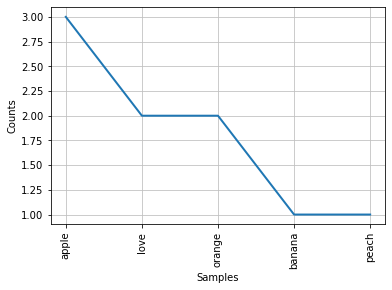

In [19]:
g_data4 = nltk.Text(data4, name='다빈도 단어 그래프 출력하기')
g_data4.plot(10)

### 5-2 워드클라우드 그래프

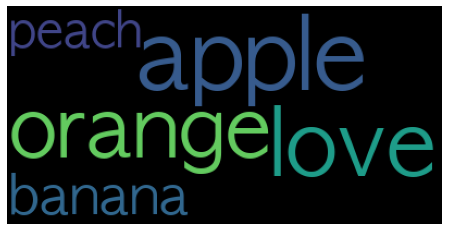

In [20]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(font_path='font/AppleGothic.ttf',
                      relative_scaling=0.2,
                      background_color='black').generate_from_frequencies(data7)

plt.figure(figsize=(10,4))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# 응용
- 스탠포드 대학교 졸업식에서 연설한 스티브 잡스의 연설문 분석

## 1. 파일 불러오기

In [23]:
jobs_data = open('data/steve.txt',encoding='cp949').read()

## 2. 토큰화 하기

In [26]:
from nltk.tokenize import WordPunctTokenizer

jobs_tokenizer = WordPunctTokenizer()
jobs_data1 = tokenizer.tokenize(jobs_data)

In [29]:
# 축약형 분리하기
from nltk.tokenize.regexp import RegexpTokenizer

jobs_tokenizer_re = RegexpTokenizer("[\w']+")
jobs_data2 = jobs_tokenizer_re.tokenize(jobs_data)

## 3. 불용어 제거하기

In [30]:
jobs_data3 = [each_word for each_word in jobs_data2
              if each_word not in stopwords.words()]

## 4. 단어별로 언급빈도 집계

In [32]:
from collections import Counter

jobs_data4 = Counter(jobs_data3)
jobs_data5 = jobs_data4.most_common(100)
jobs_data6 = dict(jobs_data5)

## 5. 집계된 단어 그래프로 표시하기

### 5-1 텍스트 그래프

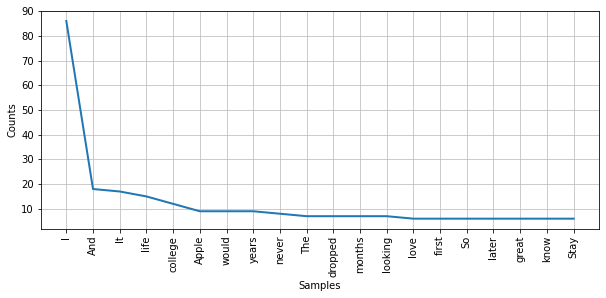

In [34]:
plt.figure(figsize=(10,4))
jobs_g_data4 = nltk.Text(jobs_data3)
jobs_g_data4.plot(20)

### 5-2 워드 클라우드 그리기

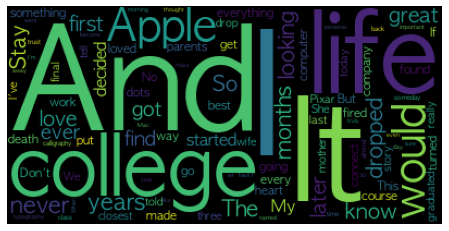

In [35]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(font_path='font/AppleGothic.ttf',
                      relative_scaling=0.2,
                      background_color='black').generate_from_frequencies(jobs_data6)

plt.figure(figsize=(10,4))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### 워드 클라우드 응용

In [44]:
# 추가로 불용어 제거한 후 워드클라우드 그리기
stop_words = open('data/eng_stop_word.txt',encoding='cp949').read()
new_jobs_data3 = [each_word for each_word in jobs_data3
                  if each_word not in stop_words]

# 1글자 이하이거나 10글자이상인 데이터 삭제
new_jobs_data4 = []
for i in range(0,len(new_jobs_data3)):
    if len(new_jobs_data3[i]) >= 1 | len(new_jobs_data3[i]) <= 10:
        new_jobs_data4.append(new_jobs_data3[i])
        
new_jobs_data5 = Counter(new_jobs_data4)
new_jobs_data6 = new_jobs_data5.most_common(100)
new_jobs_data7 = dict(new_jobs_data6)

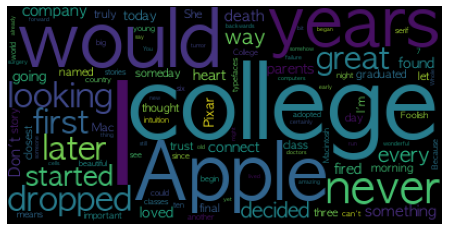

In [45]:
# 워드 클라우드 그리기
wordcloud = WordCloud(font_path='font/AppleGothic.ttf',
                      relative_scaling=0.2,
                      background_color='black').generate_from_frequencies(new_jobs_data7)

plt.figure(figsize=(10,4))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

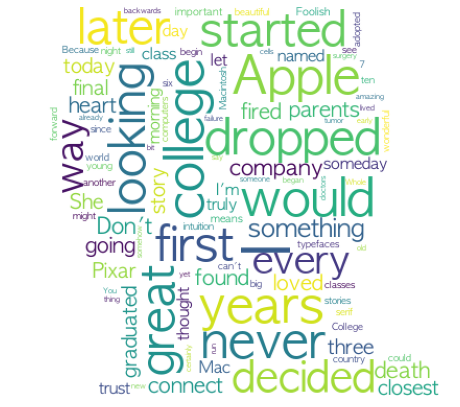

In [46]:
# 마스킹 활용
import numpy as np
from PIL import Image
from wordcloud import ImageColorGenerator

# 이미지 가져오기
steve_mask = np.array(Image.open('image/steve.jpg'))

wc = WordCloud(font_path='font/AppleGothic.ttf',
               relative_scaling=0.2, mask=steve_mask,
               background_color='white',
               min_font_size=1,
               max_font_size=60,
               max_words=2000).generate_from_frequencies(new_jobs_data7)

plt.figure(figsize=(8,8))
plt.imshow(wc)
plt.axis('off')
plt.show()

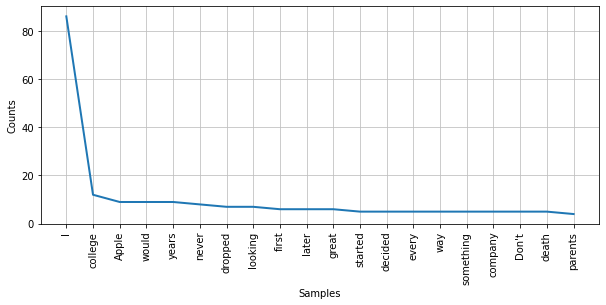

In [50]:
plt.figure(figsize=(10,4))
jobs_g_data5 = nltk.Text(new_jobs_data4)
jobs_g_data5.plot(20)